In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
data=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\datasets\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X=data.drop(columns='Class')
y=data['Class']

scale=StandardScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

train_X,test_X,train_y,test_y=train_test_split(X_scaled,y,test_size=0.3,random_state=33)

print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)
print(y.value_counts())

(199364, 30) (85443, 30) (199364,) (85443,)
Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
# Step 1: Under-sampling
under_sampling = RandomUnderSampler()
train_X_under_sampled, train_y_under_sampled = under_sampling.fit_resample(train_X, train_y)

# Check the class distribution after under-sampling
scaled_balanced_data_under = pd.concat([train_X_under_sampled, train_y_under_sampled], axis=1)
print("Under-sampled class distribution:")
print(scaled_balanced_data_under['Class'].value_counts())

# Step 2: Over-sampling 
over_sampling = RandomOverSampler()
train_X_over_sampled, train_y_over_sampled = over_sampling.fit_resample(train_X, train_y)

# Check the class distribution after over-sampling
scaled_balanced_data_over = pd.concat([train_X_over_sampled, train_y_over_sampled], axis=1)
print("Over-sampled class distribution")
print(scaled_balanced_data_over['Class'].value_counts())


Under-sampled class distribution:
Class
0    341
1    341
Name: count, dtype: int64
Over-sampled class distribution
Class
0    199023
1    199023
Name: count, dtype: int64


In [9]:
model=DecisionTreeClassifier(criterion='gini', max_depth= 10, max_features= 'sqrt', max_leaf_nodes= 10, min_impurity_decrease= 0.01, min_samples_leaf= 1, min_samples_split= 2)

In [11]:
model.fit(train_X_under_sampled,train_y_under_sampled)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=10,
                       min_impurity_decrease=0.01)

In [17]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [19]:
print("Train classification report : \n",classification_report(train_y,train_pred))
print("Test classification report : \n",classification_report(test_y,test_pred))

Train classification report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    199023
           1       0.02      0.93      0.05       341

    accuracy                           0.94    199364
   macro avg       0.51      0.93      0.51    199364
weighted avg       1.00      0.94      0.97    199364

Test classification report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85292
           1       0.02      0.85      0.05       151

    accuracy                           0.94     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.94      0.97     85443



In [21]:
print("Train classification report : \n",confusion_matrix(train_y,train_pred))
print("Test classification report : \n",confusion_matrix(test_y,test_pred))

Train classification report : 
 [[186552  12471]
 [    24    317]]
Test classification report : 
 [[80038  5254]
 [   22   129]]


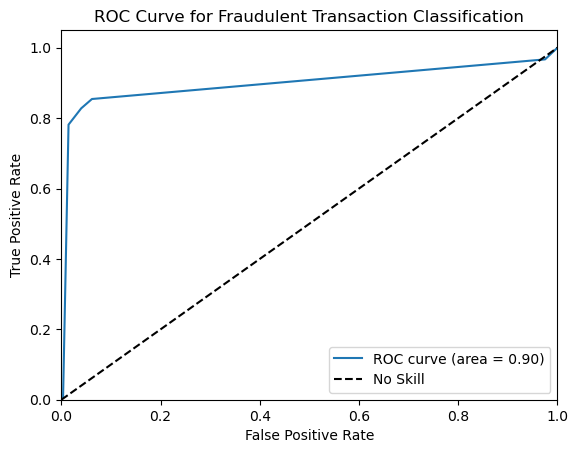

In [25]:
    
    y_pred_proba = model.predict_proba(test_X)[:, 1] 
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Fraudulent Transaction Classification')
    plt.legend()
    plt.show()